<a href="https://colab.research.google.com/github/Hoahot/HoangDucHoa19146185/blob/main/ANN_FaceRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload = files.upload()
import cv2
import numpy as np
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
#Load data
with open('dataset3.pickle', 'rb') as d:
    (x_train, y_train)= pickle.load(d)
with open('dataset2.pickle', 'rb') as d:
    (x_test, y_test)= pickle.load(d)
# Reshape Data
x_pre = x_train[68]
x_train = x_train[:68]
y_train = y_train[:68]
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (67500,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.3)

Saving dataset2.pickle to dataset2.pickle
Saving dataset3.pickle to dataset3.pickle
Epoch 1/20
2/2 [==============================] - 1s 376ms/step - loss: 1.0431 - acc: 1.0000 - val_loss: 0.8952 - val_acc: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 205ms/step - loss: 1.5432 - acc: 1.0000 - val_loss: 0.6915 - val_acc: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 212ms/step - loss: 0.6593 - acc: 1.0000 - val_loss: 0.0156 - val_acc: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 209ms/step - loss: 0.0103 - acc: 1.0000 - val_loss: 2.2858e-04 - val_acc: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 209ms/step - loss: 1.4216e-04 - acc: 1.0000 - val_loss: 4.4919e-06 - val_acc: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 206ms/step - loss: 2.5553e-06 - acc: 1.0000 - val_loss: 1.4495e-07 - val_acc: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 206ms/step - loss: 8.0543e-08 - acc: 1.0000 - val_loss: 7.8811e

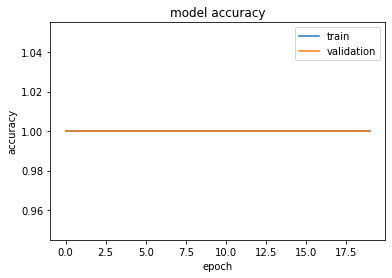

In [ ]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

0


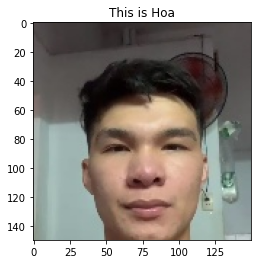

In [5]:
img1 = x_pre.reshape(1,-1)
img1 = img1.astype('float32')
img1 /= 255
k = np.argmax(model.predict(img1))
print(k)
if k ==0:
  plt.title("This is Hoa")
if k == 1:
 plt.title("Not Hoa")

plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))